# Sentiment Analysis Using Huggingface Transformers (Boston Airbnb Reviews)
This notebook demonstrates how to perform **sentiment analysis** on text data using the **Hugging Face `transformers`** library—specifically the `pipeline("sentiment-analysis")`.  
We'll apply it to the Boston airbnb review data.

## What is Sentiment Analysis?
**Sentiment analysis** (a type of text classification) detects the **polarity** of opinions expressed in text—commonly **positive**, **negative**, or **neutral**.  
Typical uses include:
- Monitoring customer feedback (e.g., app store reviews, support tickets)
- Brand & reputation tracking on social media
- Voice of customer analytics for product improvement


## Huggingface & Transformers
- In the world of AI, [Hugging Face](https://huggingface.co) is quite the star. It’s an AI community and platform that provides state-of-the-art tools and models for Natural Language Processing (NLP). It hosts thousands of pre‑trained models and datasets for NLP, computer vision, audio and LLMs.
- Hugging Face’s most popular offering is the **Transformers** library. The Transformers library comes packed with APIs and tools that let you easily grab and train top-notch pre-trained models.
- For quick experimentation, the **`pipeline`** abstraction wraps tokenization, model loading, and inference with one line of code.

In this notebook we will use Bert based model to conduct sentiment analysis.
- `pipeline("sentiment-analysis")` → loads a default sentiment model (e.g., a BERT or DistilBERT variant) and returns **label** and **score**.


# BERT-Based Models in Sentiment Analysis

A **BERT-based model in sentiment analysis** means using the **BERT (Bidirectional Encoder Representations from Transformers)** architecture as the foundation for predicting whether a piece of text expresses a **positive, negative, or neutral** sentiment.

## 1. What is BERT?
- **BERT** is a deep learning model developed by Google (2018).
- Built on the **transformer** architecture and is **bidirectional**, meaning it looks at the entire sentence both left-to-right and right-to-left when learning context.
- Pretrained on large text corpora (Wikipedia, BooksCorpus), so it already understands a lot of language before fine-tuning.

## 2. How it’s Used in Sentiment Analysis
- **Fine-tuning**: Start with pretrained BERT and train it further on a labeled sentiment dataset (e.g., movie reviews with “positive/negative” labels).
- The final classification layer is usually a **softmax output** that predicts sentiment categories.
- Example:  
  Input = *“This movie was amazing!”* → Output = *Positive (0.95 probability)*.

## 3. Advantages of BERT in Sentiment Analysis
- **Contextual understanding**: Captures meaning based on surrounding words (e.g., “bank” in *river bank* vs *investment bank*).
- **Handles subtle sentiment**: Detects sarcasm, negation (“not bad” = positive), or mixed tones.
- **Transfer learning**: Pretraining gives it strong language understanding, so it performs well with relatively small sentiment datasets.

## 4. Variants
- **DistilBERT, RoBERTa, ALBERT** – lighter or optimized BERT-based models.
- **Domain-specific BERT** – e.g., *FinBERT* (finance), *BioBERT* (biomedical), *BERTweet* (tweets) for specialized sentiment tasks.

# Apply Bert based model to Sentiment Analysis
## Import Package

In [1]:
import os
import pandas as pd
from transformers import pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# create a function to generate confusion matrix and classification report for sentiment analysis

def classification_evaluation(y_true, y_pred):
    classes = ["Positive", "Neutral", "Negative"]

    # generate Confusion matrix (fixed label order)
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix - Sentiment Analysis")
    plt.show()

    # generate classification report with the SAME labels & names. Use three decimal places
    print(classification_report(y_true, y_pred, labels=classes, target_names=classes, digits=3))

/home/sli/.conda/envs/AI500Env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load default sentiment-analysis pipeline

In [2]:
# we will use default model: distilbert/distilbert-base-uncased-finetuned-sst-2-english

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


## Run sentiment analysis based on a single text

In [3]:
review1="Amazing stay! The apartment was spotless and the host was super helpful."

sentiment_pipeline(review1)

[{'label': 'POSITIVE', 'score': 0.9995788931846619}]

In [4]:
review2="We do not have a good experience. The room is too old and there is loud noise during the night"

sentiment_pipeline(review2)

[{'label': 'NEGATIVE', 'score': 0.99977046251297}]

In [5]:
review3="The location is great, but the bed was uncomfortable." 
sentiment_pipeline(review3)

[{'label': 'NEGATIVE', 'score': 0.9880151152610779}]

In [6]:
review4_in_Spanish="El departamento estÃ¡ muy bien ubicado en una muy buena zona cerca de Boston Common.\
EstÃ¡ muy bien equipado con todo lo necesario y de muy buen gusto. Michael nos recibiÃ³ muy amablemente brindando todas las indicaciones \
sobre el departamento e informaciÃ³n sobre el barrio y sus comercios. Merece destacar que nos obsequiÃ³ con un excelente vino que disfrutamos\
en la hermosa terraza."

review4_in_English="The apartment is very well located in a great area near Boston Common. \
It is very well equipped with everything necessary and decorated with very good taste. \
Michael welcomed us very kindly, providing all the instructions about the apartment and information \
about the neighborhood and its shops. It is worth mentioning that he gifted us an excellent bottle of wine, which we enjoyed on the beautiful terrace."

result1=sentiment_pipeline(review4_in_Spanish)

result2=sentiment_pipeline(review4_in_English)

print(f'"Review in Spanish: "{result1}\n"Review in English: " {result2}')

"Review in Spanish: "[{'label': 'NEGATIVE', 'score': 0.9813812971115112}]
"Review in English: " [{'label': 'POSITIVE', 'score': 0.9998712539672852}]


 **Note:** The base BERT model was trained in English; therefore, reviews written in other languages may yield unpredictable results. This limitation is common on social media platforms and e-commerce sites with global users or U.S.-based users who choose to write in another language. Based on my experience, BERT often predicts such non-English reviews as *Neutral*, since it cannot reliably detect emotions expressed outside of English.  
>
> 💡 **Tip:** For datasets that include multiple languages, consider using **Multilingual BERT (mBERT)** or **XLM-RoBERTa**, which are trained on many languages and better suited for handling multilingual text.

## Load a different model
- The text classification task in this model is based on 3 sentiment labels.
- You can check more models from [here](https://huggingface.co/models?pipeline_tag=text-classification&sort=trending&search=bert)

In [7]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

inputs = [review1, review2, review3, review4_in_Spanish, review4_in_English ]

# set retunr_all_scores to true to return the score for all lables. Otherwise, it will only return the label with the highest probability.

result = sentiment_pipeline(inputs, return_all_scores=True)

label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

for i, predictions in enumerate(result):
  print("==================================")
  print(f"Text {i + 1}: {inputs[i]}")
  for pred in predictions:
    label = label_mapping.get(pred['label'], pred['label'])
    score = pred['score']
    print(f"{label}: {score:.2%}")

Device set to use cuda:0


Text 1: Amazing stay! The apartment was spotless and the host was super helpful.
Negative: 0.13%
Neutral: 0.91%
Positive: 98.96%
Text 2: We do not have a good experience. The room is too old and there is loud noise during the night
Negative: 97.66%
Neutral: 2.14%
Positive: 0.19%
Text 3: The location is great, but the bed was uncomfortable.
Negative: 32.89%
Neutral: 41.63%
Positive: 25.48%
Text 4: El departamento estÃ¡ muy bien ubicado en una muy buena zona cerca de Boston Common.EstÃ¡ muy bien equipado con todo lo necesario y de muy buen gusto. Michael nos recibiÃ³ muy amablemente brindando todas las indicaciones sobre el departamento e informaciÃ³n sobre el barrio y sus comercios. Merece destacar que nos obsequiÃ³ con un excelente vino que disfrutamosen la hermosa terraza.
Negative: 8.85%
Neutral: 77.35%
Positive: 13.80%
Text 5: The apartment is very well located in a great area near Boston Common. It is very well equipped with everything necessary and decorated with very good taste. 

/home/sli/.conda/envs/AI500Env/lib/python3.12/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


## Apply the twitter-roberta model to Boston airbnb review data

The Airbnb review dataset does not include predefined sentiment labels. To evaluate the model’s performance, I manually read the reviews and assigned sentiment categories (Positive, Neutral, Negative). The model’s predictions will then be compared with these human-generated labels to assess accuracy.

For illustration purposes, I labeled only 20 reviews.

### load the data

In [27]:
df=pd.read_csv('data/boston_airbnb_reviews_with_human_labels.csv')
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,human_label,comments
0,1066742,20723614,10/4/2014,4405579,J.L.,Negative,A very unique experience with some unfortunate issues that could not get worked out. Thought we could have a fun non-hotel experience while on a business trip. Hot water was only available for 1 out of 4 days and this was very uncomfortable given that I was with clients all week. Ryan sent over a manager each day that was unable to fix the problem.
1,3917027,40354718,7/30/2015,33974852,Brandi,Positive,We had a late flight in and had to leave in the early am. When we arrived the key was waiting for us and our door was marked with our name. The house is on a quiet residential street and a very short walk to the train. This was our first Airbnb experience and we were not disappointed.
2,11734812,65464730,3/13/2016,57331722,Saisha,Positive,"The apartment was really nice and comfortable. It was really sweet of the host to welcome us with a small goody basket. All essentials including shampoo, conditioner, hair dryer, iron, utensils, etc. were available. we really enjoyed our stay! Thank you!"
3,1881298,60264029,1/21/2016,11868914,Jessica,Positive,"Excellent price for a private spot in Boston, and truly right on the T! Dan was nothing but helpful settling us in, as well. There is a TV with cable and (lucky for me, I needed it) a clothing iron and a hair dryer! I always appreciate when places consider these things for guests. There are some great little places an easy walk away - coffee shop, good Indian food, a liquor store. We knew the bed would be super soft from the reviews - you sink all the way into that memory foam! So, if you want a firm mattress, this ain't the place. But a nice spot overall - would stay again!"
4,3992208,94685296,8/16/2016,47998084,Laura,Negative,Nice neighbourhood. Great location. Very close to Fenway park. Unfortunately retrieving the key from a lock box locked to a fence over a highway was not a great first impression. Secondly the key to the apartment blocks did not work and we were stranded outside at night. I tried to contact Sean but there was no answer. We ended up ringing another apartment to let us in. It meant we could not leave the apartment to go explore boston because we wouldn't be able to get back in. If the key worked it would have been an ideal apartment to stay in. However knowing you can leave your apartment and get back in is kind of important.


In [28]:
df.shape

(20, 7)

### Apply the model to comments column

for illustration purpose, we will only focus on the first 100 reviews

In [31]:
from transformers import pipeline

sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")

#sentiment_pipeline = pipeline(model="delarosajav95/tw-roberta-base-sentiment-FT-v2")

label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

# covert comments columns to list

reviews = df['comments'].tolist()

# pipeline returns a list of dicts.
# deafult retunr_all_scores is false. It will only return the label with the highest probability.

outputs = sentiment_pipeline(reviews, batch_size=32, truncation=True, max_length=512)

# Map labels and collect scores
df['sentiment'] = [label_mapping.get(o['label'], o['label']) for o in outputs]
df['sentiment_score'] = [o['score'] for o in outputs]

df.head()

Device set to use cuda:0


,listing_id,id,date,reviewer_id,reviewer_name,human_label,comments,sentiment,sentiment_score
0,1066742,20723614,10/4/2014,4405579,J.L.,Negative,A very unique experience with some unfortunate issues that could not get worked out. Thought we could have a fun non-hotel experience while on a business trip. Hot water was only available for 1 out of 4 days and this was very uncomfortable given that I was with clients all week. Ryan sent over a manager each day that was unable to fix the problem.,Negative,0.662607
1,3917027,40354718,7/30/2015,33974852,Brandi,Positive,We had a late flight in and had to leave in the early am. When we arrived the key was waiting for us and our door was marked with our name. The house is on a quiet residential street and a very short walk to the train. This was our first Airbnb experience and we were not disappointed.,Positive,0.815163
2,11734812,65464730,3/13/2016,57331722,Saisha,Positive,"The apartment was really nice and comfortable. It was really sweet of the host to welcome us with a small goody basket. All essentials including shampoo, conditioner, hair dryer, iron, utensils, etc. were available. we really enjoyed our stay! Thank you!",Positive,0.993154
3,1881298,60264029,1/21/2016,11868914,Jessica,Positive,"Excellent price for a private spot in Boston, and truly right on the T! Dan was nothing but helpful settling us in, as well. There is a TV with cable and (lucky for me, I needed it) a clothing iron and a hair dryer! I always appreciate when places consider these things for guests. There are some great little places an easy walk away - coffee shop, good Indian food, a liquor store. We knew the bed would be super soft from the reviews - you sink all the way into that memory foam! So, if you want a firm mattress, this ain't the place. But a nice spot overall - would stay again!",Positive,0.951769
4,3992208,94685296,8/16/2016,47998084,Laura,Negative,Nice neighbourhood. Great location. Very close to Fenway park. Unfortunately retrieving the key from a lock box locked to a fence over a highway was not a great first impression. Secondly the key to the apartment blocks did not work and we were stranded outside at night. I tried to contact Sean but there was no answer. We ended up ringing another apartment to let us in. It meant we could not leave the apartment to go explore boston because we wouldn't be able to get back in. If the key worked it would have been an ideal apartment to stay in. However knowing you can leave your apartment and get back in is kind of important.,Neutral,0.389292


In [32]:
# check number of reviews by sentiment

df['sentiment'].value_counts()

sentiment
Positive    16
Neutral      3
Negative     1
Name: count, dtype: int64

### Visualize the sentiment distribution

In [33]:
result=df['sentiment'].value_counts().reset_index()
result

,sentiment,count
0,Positive,16
1,Neutral,3
2,Negative,1


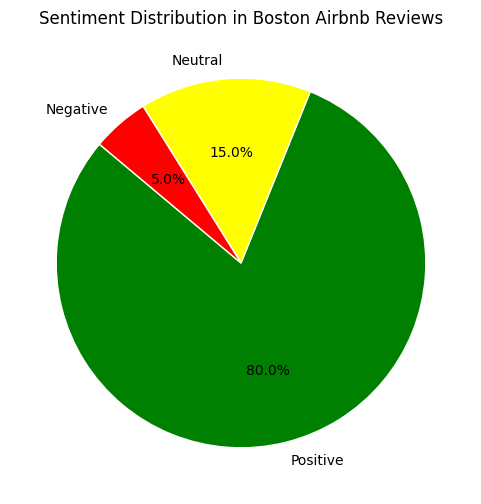

In [34]:
import matplotlib.pyplot as plt

# Define custom colors (order must match labels)
colors = ["green", "yellow", "red"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    result['count'],
    labels=result['sentiment'],
    autopct='%1.1f%%',       # Show percentages
    startangle=140,          # Rotate for better appearance
    colors=colors,           # Apply custom colors
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Sentiment Distribution in Boston Airbnb Reviews")
plt.show()

### check all negative comments

In [35]:
# change column width to see full comments.
pd.set_option("display.max_colwidth", None) 

df[df['sentiment']=='Negative']['comments']

0    A very unique experience with some unfortunate issues that could not get worked out. Thought we could have a fun non-hotel experience while on a business trip. Hot water was only available for 1 out of 4 days and this was very uncomfortable given that I was with clients all week. Ryan sent over a manager each day that was unable to fix the problem.
Name: comments, dtype: object

# Evaluate Model Performance

Compare the human generated label with the prediction from bert model

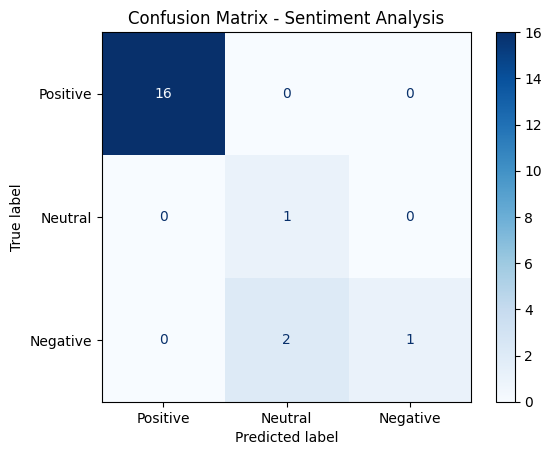

              precision    recall  f1-score   support

    Positive      1.000     1.000     1.000        16
     Neutral      0.333     1.000     0.500         1
    Negative      1.000     0.333     0.500         3

    accuracy                          0.900        20
   macro avg      0.778     0.778     0.667        20
weighted avg      0.967     0.900     0.900        20



In [36]:
# Evaluate the model performance

y_true = df['human_label']
y_pred = df['sentiment']
    
classification_evaluation(y_true, y_pred)

## Sentiment Classification Results Interpretation

## Key Metrics and Formulas

1. **Accuracy**  
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
$$

2. **Precision (per class)**  
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$  
Measures how many predicted positives are actually correct.

3. **Recall (per class)**  
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$  
Measures how many actual positives were correctly identified.

4. **F1 Score (per class)**  
$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
$$  
Balances precision and recall into a single metric.

---

### Interpretation of Results

**1. Confusion Matrix**  
- **Positive reviews**: Out of 16 true positives, the model correctly classified all 16 (perfect accuracy for this class).  
- **Neutral reviews**: Only 1 review labeled as Neutral, and the model correctly predicted it.  
- **Negative reviews**: Out of 3 true negatives, the model correctly identified 1 but misclassified 2 as Neutral.  

**2. Metrics Breakdown**  
- **Positive Class**:  
  - Precision = 1.00, Recall = 1.00, F1 = 1.00  
  - The model performs perfectly here, likely because this class dominates the dataset (16/20).  

- **Neutral Class**:  
  - Precision = 0.33, Recall = 1.00, F1 = 0.50  
  - The model captured the single Neutral review but also misclassified 2 Negatives as Neutral, leading to low precision.  

- **Negative Class**:  
  - Precision = 1.00, Recall = 0.33, F1 = 0.50  
  - The model is precise when it predicts Negative, but it misses most true Negative cases (low recall).  

**3. Overall Performance**  
- **Accuracy** = 90% (18 out of 20 reviews correctly classified).  
- **Macro Average (equal weight per class)**: F1 = 0.667 → reflects imbalance between classes.  
- **Weighted Average (weighted by support)**: F1 = 0.900 → high overall because Positive dominates.  

---

### Key Insights

- The model is **very strong at detecting Positive sentiment** (likely due to class imbalance).  
- Performance drops for **Neutral and Negative** classes, especially recall for Negative (only 1 of 3 detected).  
- With such a small sample (20 reviews, heavily skewed toward Positive), these results should be interpreted cautiously.  
- A larger, more balanced labeled dataset is needed for a fair evaluation.

# Solutions to the assignment

In [47]:
df=pd.read_csv('data/hotel_food_movie_reviews_labels.csv')
df.head()

,ID,category,review,human_label
0,1,airbnb hotel,We did not meet Hermina in person. Her emails were prompt and professional.,Neutral
1,2,airbnb hotel,"Listing was accurate, the place was nice and in a decent location in Chinatown not far from the Boston Common.\r\n\r\nThe only gripes I have are that the Internet was out during my stay although this was fixed within a day and the agreed upon ""flexible check in"" time we had agreed upon was not fulfilled as Elkin did not respond to my message to give me details on how to get into the apartment (agreed upon check in time was early morning on the 8th which he agreed to). \r\n\r\nI had to stay at the hostel down the street (I arrived at the apartment at 1am) until he responded. Leaving me to spend $50 that I shouldn't have had to spend.",Negative
2,3,airbnb hotel,Dave was an excellent communicator and made our first trip to Boston effortless. His place was cozy and welcoming. We loved the huge bed and all the amazing furnishings. Sharing the bathroom was no problem and we were able to come and go as we pleased. We'd definitely stay here again!,Positive
3,4,airbnb hotel,Octavio was responsive by text. The building is pretty rough.,Neutral
4,5,airbnb hotel,"This was my first time using Airbnb and it was great! Just as described, we had a nice bedroom with a huge bathroom en -suite. The room was on the top floor so we had our own space. The house was 5 min walk from T (Orange line, Green Street) and it took us about 10 -15 min to get into the city center. Pam and Sara provided us with all necessities, including Keurig coffee maker with K-cups. There was also a flat screen TV, AC, and a wireless internet. They have a lovely cat Derby that visited us, but was not intrusive. Unfortunately we did not meet Pam and Sara in person as they were away (they had to leave due to family circumstance), but they were great with their communications. We had no problem finding the house and getting into it using lock box, as well as using free street parking. They even left some recommendations about the neighborhood and good places to eat (which we used). We stayed in-touch until our departure and Pam was updating us regularly about their plans. Although we never met in person, Pam's communication was so caring that I felt like part of the family. I really hope that next time we are in Boston we can stay with Pam and Sara and meet them in person.\r\nThank you, Pam and Sara!",Positive


In [48]:
from transformers import pipeline

sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")

label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

# Prepare review list (handle missing values)
reviews = df['review'].tolist()

# pipeline returns a list of dicts.
# deafult retunr_all_scores is false. It will only return the label with the highest probability.
outputs = sentiment_pipeline(reviews, batch_size=32,truncation=True, max_length=512)

# Map labels and collect scores
df['sentiment'] = [label_mapping.get(o['label'], o['label']) for o in outputs]
df['sentiment_score'] = [o['score'] for o in outputs]

df.head(3)

Device set to use cuda:0


,ID,category,review,human_label,sentiment,sentiment_score
0,1,airbnb hotel,We did not meet Hermina in person. Her emails were prompt and professional.,Neutral,Neutral,0.527849
1,2,airbnb hotel,"Listing was accurate, the place was nice and in a decent location in Chinatown not far from the Boston Common.\r\n\r\nThe only gripes I have are that the Internet was out during my stay although this was fixed within a day and the agreed upon ""flexible check in"" time we had agreed upon was not fulfilled as Elkin did not respond to my message to give me details on how to get into the apartment (agreed upon check in time was early morning on the 8th which he agreed to). \r\n\r\nI had to stay at the hostel down the street (I arrived at the apartment at 1am) until he responded. Leaving me to spend $50 that I shouldn't have had to spend.",Negative,Neutral,0.453106
2,3,airbnb hotel,Dave was an excellent communicator and made our first trip to Boston effortless. His place was cozy and welcoming. We loved the huge bed and all the amazing furnishings. Sharing the bathroom was no problem and we were able to come and go as we pleased. We'd definitely stay here again!,Positive,Positive,0.992123


In [49]:
df['sentiment'].value_counts()

sentiment
Positive    35
Neutral     28
Negative    27
Name: count, dtype: int64

In [50]:
df['human_label'].value_counts()

human_label
Positive    37
Negative    34
Neutral     19
Name: count, dtype: int64

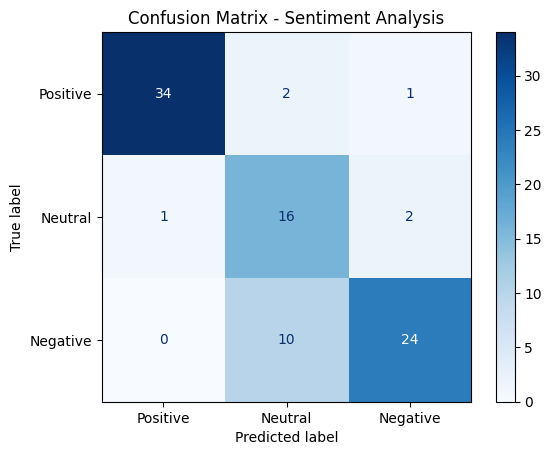

              precision    recall  f1-score   support

    Positive      0.971     0.919     0.944        37
     Neutral      0.571     0.842     0.681        19
    Negative      0.889     0.706     0.787        34

    accuracy                          0.822        90
   macro avg      0.811     0.822     0.804        90
weighted avg      0.856     0.822     0.829        90



In [51]:
# Evaluate the model performance

y_true = df['human_label']
y_pred = df['sentiment']
    
classification_evaluation(y_true, y_pred)

## Interpretation of Sentiment Classification Results

### Overall Accuracy
- The model achieved **82.2% accuracy** (≈ 82% of reviews were classified correctly).  
- Out of 90 reviews, about 74 were correct and 16 were misclassified.  


### Class-Level Metrics

#### **Positive (37 true samples)**
- **TP = 34** (correctly predicted as Positive)  
- **FP = 1** (one Neutral misclassified as Positive)  
- **FN = 3** (two misclassified as Neutral, one as Negative)  

Metrics:
- **Precision = 0.971** → Of all items predicted Positive, 97% were truly Positive.  
- **Recall = 0.919** → Of all true Positives, 92% were captured.  
- **F1 = 0.944** → Very strong balance.  

👉 The model is excellent at detecting Positive reviews.  


#### **Neutral (19 true samples)**
- **TP = 16**  
- **FP = 12** (2 Positive + 10 Negatives misclassified as Neutral)  
- **FN = 3** (2 predicted as Negative, 1 as Positive)  

Metrics:
- **Precision = 0.571** → Only 57% of predicted Neutrals were actually Neutral.  
- **Recall = 0.842** → Most true Neutrals were captured.  
- **F1 = 0.681** → Weakest performance among classes.  

👉 The model **over-predicts Neutral** (lots of Negative reviews are misclassified as Neutral). This drags precision down.  

#### **Negative (34 true samples)**
- **TP = 24**  
- **FP = 3** (1 Positive + 2 Neutrals misclassified as Negative)  
- **FN = 10** (misclassified as Neutral)  

Metrics:
- **Precision = 0.889** → Nearly 89% of predicted Negatives were correct.  
- **Recall = 0.706** → Only 71% of true Negatives were captured (many confused with Neutral).  
- **F1 = 0.787** → Decent, but weaker recall.  

👉 The model is good at flagging Negatives when it predicts them, but misses many true Negatives, calling them Neutral instead.  

### Key Takeaways
1. **Strengths**: Very strong on **Positive** sentiment (97% precision, 92% recall).  
2. **Weaknesses**: Struggles with **Neutral** — it captures them (high recall) but mistakes many Negatives as Neutral (low precision).  
3. **Negative**: Reliable precision, but recall is weaker (misses many Negatives).  
4. **Biggest confusion**: **Negative ↔ Neutral** — the model often calls true Negatives “Neutral.” 
5. **Human interpretation matters**: Variability in how individuals label reviews can also affect results. Each person may interpret the same text differently, which introduces subjectivity into the ground truth and impacts model evaluation.  

In [45]:
df['category'].value_counts()

category
airbnb hotel          30
amazon food review    30
imdb movie review     30
Name: count, dtype: int64

Classification accuracy for Airbnb Hotel



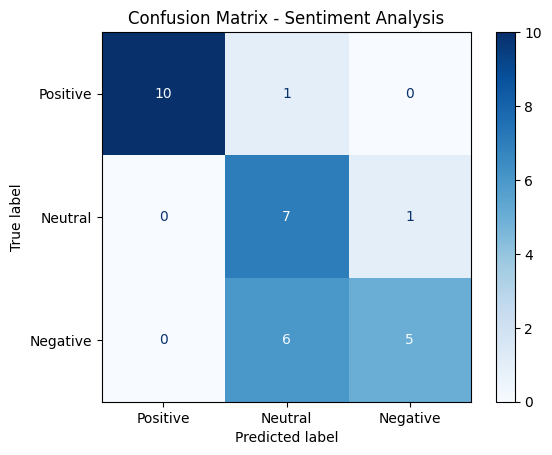

              precision    recall  f1-score   support

    Positive      1.000     0.909     0.952        11
     Neutral      0.500     0.875     0.636         8
    Negative      0.833     0.455     0.588        11

    accuracy                          0.733        30
   macro avg      0.778     0.746     0.726        30
weighted avg      0.806     0.733     0.735        30

Classification accuracy for Amazon Food Review



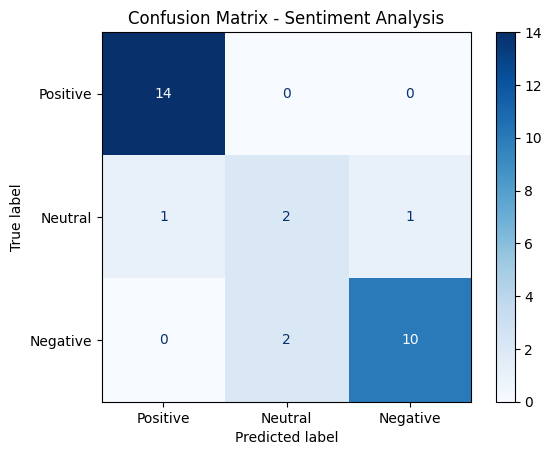

              precision    recall  f1-score   support

    Positive      0.933     1.000     0.966        14
     Neutral      0.500     0.500     0.500         4
    Negative      0.909     0.833     0.870        12

    accuracy                          0.867        30
   macro avg      0.781     0.778     0.778        30
weighted avg      0.866     0.867     0.865        30

Classification accuracy for Imdb Movie Review



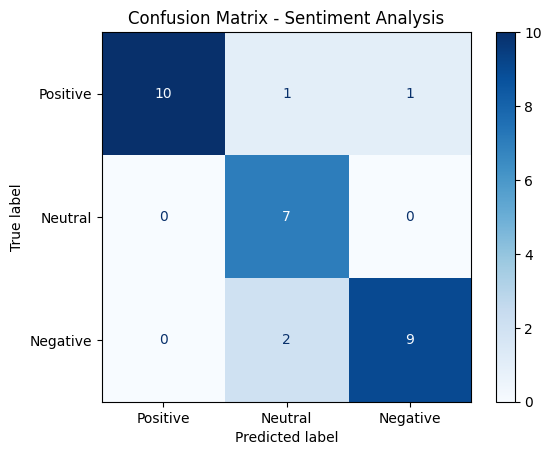

              precision    recall  f1-score   support

    Positive      1.000     0.833     0.909        12
     Neutral      0.700     1.000     0.824         7
    Negative      0.900     0.818     0.857        11

    accuracy                          0.867        30
   macro avg      0.867     0.884     0.863        30
weighted avg      0.893     0.867     0.870        30



In [46]:
# Evaluate the model performance

y_true = df[df.category=="airbnb hotel"]['human_label']
y_pred = df[df.category=="airbnb hotel"]['sentiment']

print("Classification accuracy for Airbnb Hotel\n")
   
classification_evaluation(y_true, y_pred)

y_true = df[df.category=="amazon food review"]['human_label']
y_pred = df[df.category=="amazon food review"]['sentiment']

print("Classification accuracy for Amazon Food Review\n")
   
classification_evaluation(y_true, y_pred)

y_true = df[df.category=="imdb movie review"]['human_label']
y_pred = df[df.category=="imdb movie review"]['sentiment']

print("Classification accuracy for Imdb Movie Review\n")
   
classification_evaluation(y_true, y_pred)